# Временные ряды 3. 

# ARIMA



In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import itertools

## Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from random import random
import warnings
warnings.filterwarnings("ignore") 

In [19]:
file = '../input/energy/my_PJME_MW.csv'

In [20]:
data = pd.read_csv(file, index_col=[0], parse_dates=[0])
data

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02,20:00:00,44057.0,2018,8,2,3,214,31,3,20,0,0,0
2018-08-02,21:00:00,43256.0,2018,8,2,3,214,31,3,21,0,0,0
2018-08-02,22:00:00,41552.0,2018,8,2,3,214,31,3,22,0,0,0


In [21]:
data_model_w = data['PJME_MW'].resample('W').mean()
data_model_m = data['PJME_MW'].resample('M').mean()


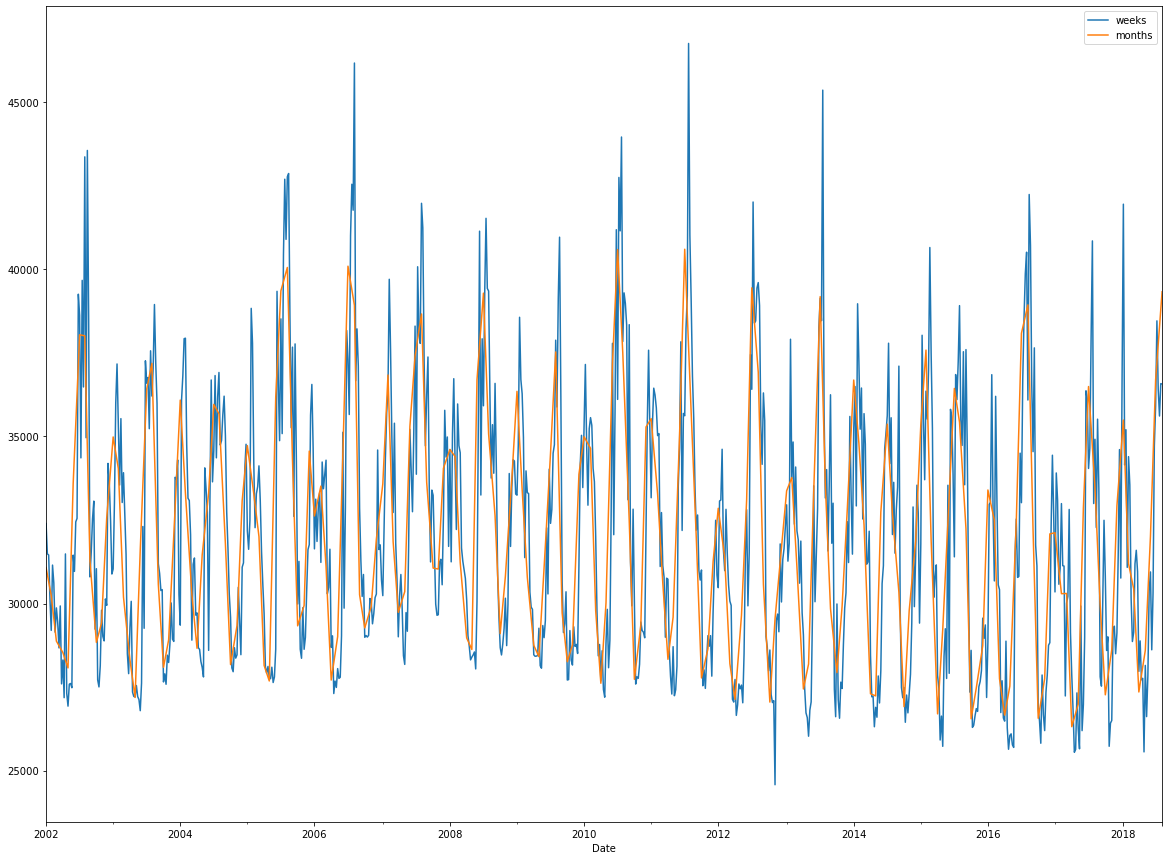

In [22]:
data_model_w.plot(figsize = (20,15), label = 'weeks')
data_model_m.plot(figsize = (20,15), label = 'months')
plt.legend()


2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

# Посмотрим недельные данные


In [23]:
# Определим p, d и q 
q = 0
p = 2
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 1
ds = 0
seasonal_pdq = [ps, ds, qs ,12]
N = 50

In [24]:
warnings.filterwarnings("ignore")

mod_sarimax_w = sm.tsa.statespace.SARIMAX(data_model_w[:-N],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results_w = mod_sarimax_w.fit()



mod_sarimax_m = sm.tsa.statespace.SARIMAX(data_model_m[:-N],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results_m = mod_sarimax_m.fit()
print(f'SARIMAX на недельных данных{pdq}x{seasonal_pdq} - AIC:{results_w.aic}')
print(f'SARIMAX на месячных данных {pdq}x{seasonal_pdq} - AIC:{results_m.aic}')



SARIMAX на недельных данных[2, 1, 0]x[1, 0, 1, 12] - AIC:14765.416293027152
SARIMAX на месячных данных [2, 1, 0]x[1, 0, 1, 12] - AIC:2404.146987416906


In [25]:
print(results_w.summary().tables[0],results_w.summary().tables[1])
print(results_m.summary().tables[0],results_m.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                              PJME_MW   No. Observations:                  816
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -7377.708
Date:                              Sat, 07 Nov 2020   AIC                          14765.416
Time:                                      16:21:55   BIC                          14788.846
Sample:                                  01-06-2002   HQIC                         14774.416
                                       - 08-20-2017                                         
Covariance Type:                                opg                                         
============================================================================================ ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

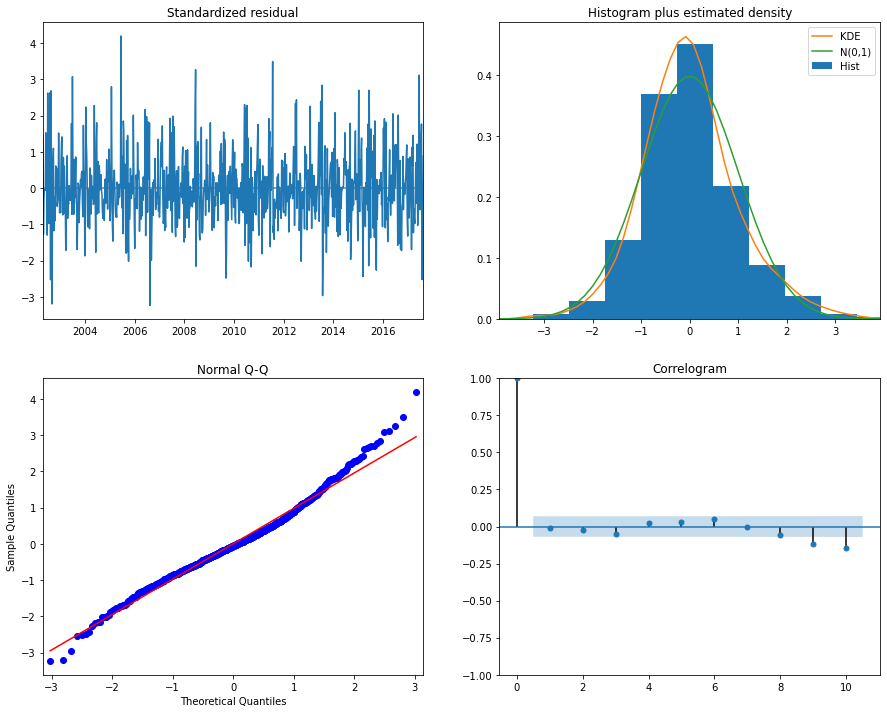

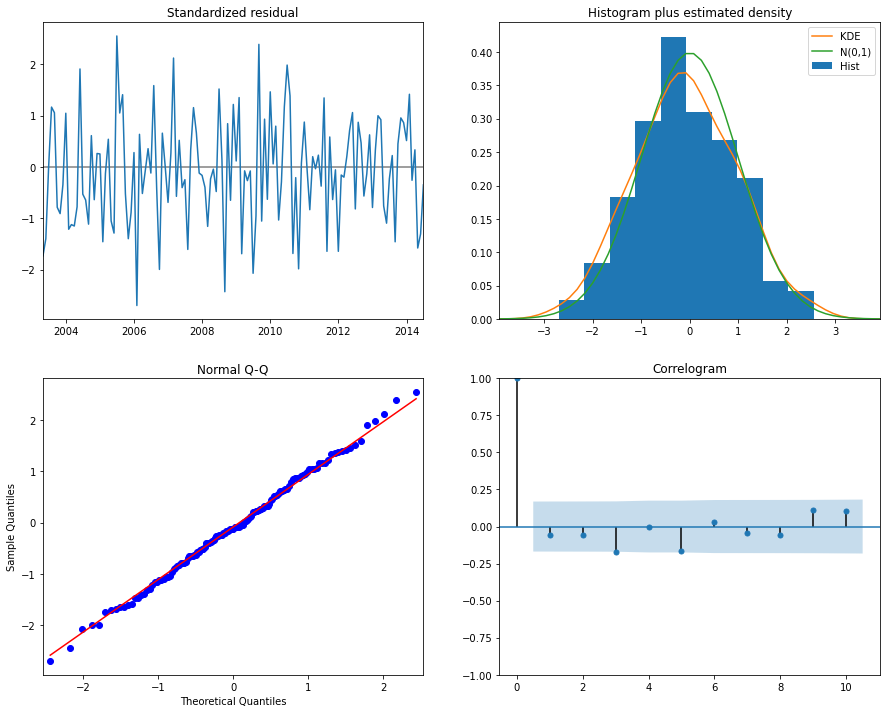

In [26]:
results_w.plot_diagnostics(figsize=(15, 12))
results_m.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q

qs = 1
ps = 1
ds = 0
seasonal_pdq = [ps, ds, qs ,12]
N = 50

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(data_model_m.values[:-100],
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

# Постройте ACF, PACF и модель ARIMA для BRENT (недельный )



In [28]:
path_brent = '../input/brents/my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [29]:
brent_w = brent_data.resample('W').mean()
brent_m = brent_data.resample('M').mean()
brent_m

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.037037,0.037037,0.037037
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.038462,0.038462,0.038462
2010-11-30,86.178077,2010.0,11.0,15.346154,4.0,319.346154,45.692308,2.500000,0.076923,0.076923,0.076923
2010-12-31,92.232308,2010.0,12.0,16.384615,4.0,350.384615,50.115385,2.576923,0.076923,0.076923,0.000000
2011-01-31,97.033200,2011.0,1.0,16.680000,1.0,16.680000,4.640000,2.760000,0.040000,0.040000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,69.966667,2019.0,5.0,16.222222,2.0,136.222222,20.074074,2.703704,0.037037,0.037037,0.037037
2019-06-30,62.980400,2019.0,6.0,15.600000,2.0,166.600000,24.400000,2.800000,0.000000,0.000000,0.000000
2019-07-31,64.292963,2019.0,7.0,15.925926,3.0,196.925926,28.777778,2.481481,0.037037,0.037037,0.037037


In [48]:
brent_w = brent_w.dropna(how='all')

In [43]:
brent_w[brent_w['Значение'].isnull()]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пришлось чуть поискать ошибку. Не получалось вывести недельную ARIMA. Оказалось что 2011-10-16	нулевые значения. Удалил эту строку и все ошибки ушли.

In [49]:
brent_w[brent_w['Значение'].isnull()]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,


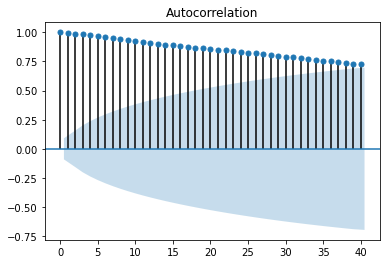

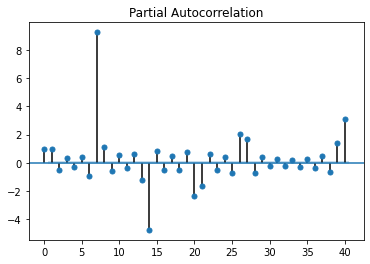

In [80]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(brent_w['Значение'].values, lags=40)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_w['Значение'].values, lags=40)
plt.show()

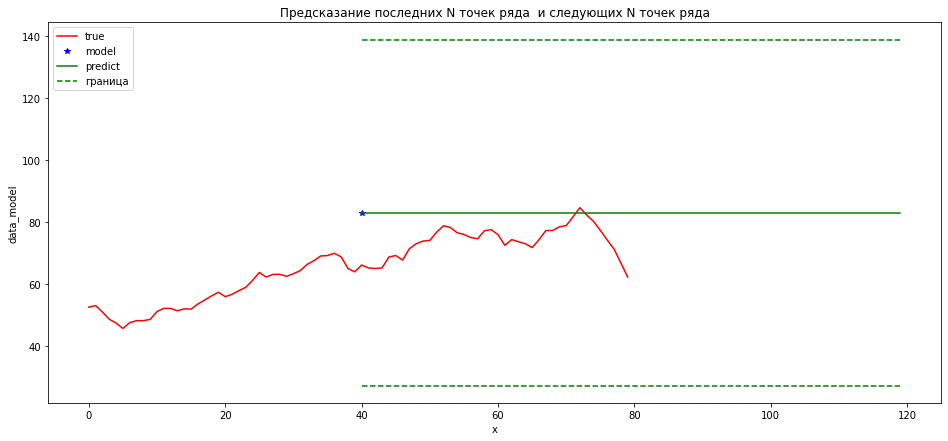

In [81]:
N=40
data_model = brent_w['Значение'].values[:-N]
# число точек для теста
# строим модель
model = ARIMA(data_model[:-N], order=(0,0,0))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)

plt.figure(figsize=(16,7))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

In [86]:
import itertools

# Определим p, d и q в диапазоне 0-2
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values,order=param,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{} - AIC:{}'.format(param,  results.aic))
        except:
            continue

ARIMA(0, 0, 0) - AIC:5488.563402265109
ARIMA(0, 0, 1) - AIC:4845.65122899332
ARIMA(0, 0, 2) - AIC:4274.540860738751
ARIMA(0, 1, 0) - AIC:2088.1824301636643
ARIMA(0, 1, 1) - AIC:2028.5403231166943
ARIMA(0, 1, 2) - AIC:2027.0022424944214
ARIMA(0, 2, 0) - AIC:2222.3601135943795
ARIMA(0, 2, 1) - AIC:2082.6864978273416
ARIMA(0, 2, 2) - AIC:2027.3492455292837
ARIMA(1, 0, 0) - AIC:2093.543388264666
ARIMA(1, 0, 1) - AIC:2033.8549990753904
ARIMA(1, 0, 2) - AIC:2032.089452331916
ARIMA(1, 1, 0) - AIC:2036.911206958056
ARIMA(1, 1, 1) - AIC:2030.507927659056
ARIMA(1, 1, 2) - AIC:2026.66292516096
ARIMA(1, 2, 0) - AIC:2187.2711037812114
ARIMA(1, 2, 1) - AIC:2037.4249840275227
ARIMA(1, 2, 2) - AIC:2029.3490213144696
ARIMA(2, 0, 0) - AIC:2038.51901488334
ARIMA(2, 0, 1) - AIC:2035.7916369675468
ARIMA(2, 0, 2) - AIC:2032.8332149291148
ARIMA(2, 1, 0) - AIC:2031.726083027083
ARIMA(2, 1, 1) - AIC:2031.77246197534
ARIMA(2, 1, 2) - AIC:2028.6301430046958
ARIMA(2, 2, 0) - AIC:2133.6799546018055
ARIMA(2, 2, 1) 

Параметры 0,2,2 - самые оптимальные.

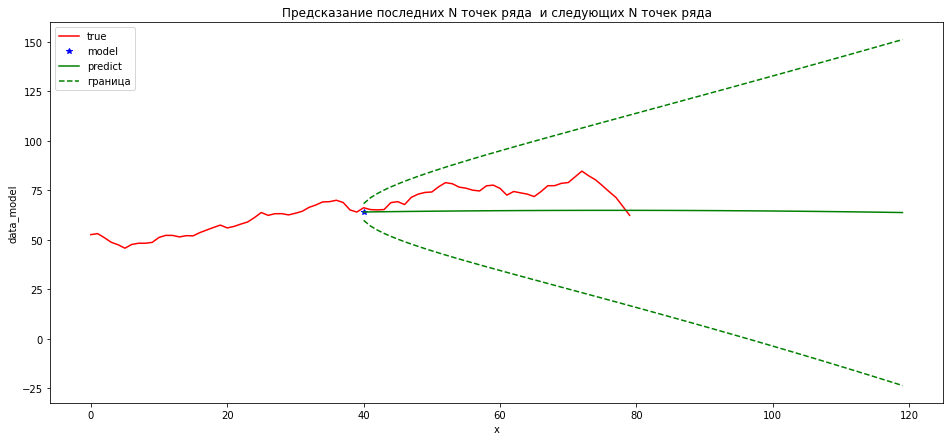

In [87]:
p = 0
d = 2
q = 2
# строим модель
model = ARIMA(data_model[:-N], order=(p,d,q))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)

plt.figure(figsize=(16,7))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

Далее сделаем для двух первых разностей

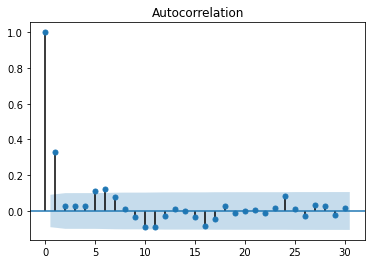

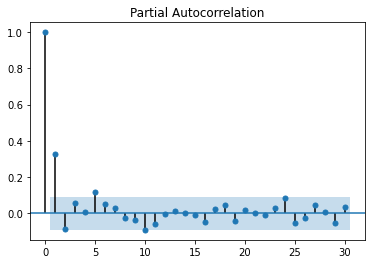

In [92]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
brent_dif = brent_w['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()

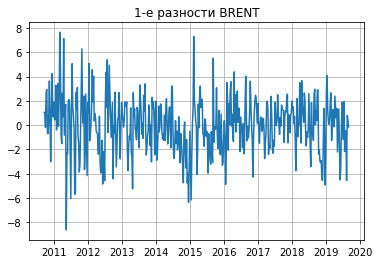

In [93]:
plt.plot(brent_dif)
plt.grid()
plt.title('1-е разности BRENT')
plt.show()

In [123]:


import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1,2]
p = [0,1,2] 
q = range(0,3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_bd = sm.tsa.statespace.SARIMAX(brent_dif[100:-100],order=param,seasonal_order=[0,0,0,0],
                                          stepwise=False, approximation=False, max_order=2)

        results_ = mod_bd.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:1150.8599278663637
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:1117.3094461684113
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:1118.270700041546
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:1214.927654306799
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:1145.4576708469137
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:1119.4323858439086
ARIMA(0, 2, 0)x[0, 0, 0, 0] - AIC:1460.6459189641027
ARIMA(0, 2, 1)x[0, 0, 0, 0] - AIC:1218.9817712649215
ARIMA(0, 2, 2)x[0, 0, 0, 0] - AIC:1153.459928252414
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:1117.8884766766798
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:1118.2964403387823
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:1120.270646245818
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:1196.1458284511186
ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:1120.632176470424
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1120.858097643118
ARIMA(1, 2, 0)x[0, 0, 0, 0] - AIC:1373.8889298674267
ARIMA(1, 2, 1)x[0, 0, 0, 0] - AIC:1200.7532402593322
ARIMA(1, 2, 2)x[0, 0, 0, 0] - AIC:1131.60630870062
ARIMA(2, 0, 0)x[0, 0, 0, 0] - AIC:1118.3541288111173
A

Подставляем значения 0,0,1

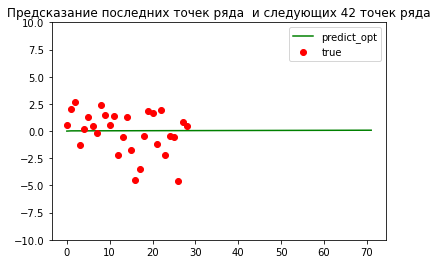

In [124]:
N1=100
N2=30
nforecast = N2+42
modb_optd = sm.tsa.statespace.SARIMAX(brent_dif[N1:-N2],
                               order=[0,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_invertibility=False)
resultsb_optd = modb_optd.fit()
#делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_optd.forecast(nforecast) 

plt.plot(pred_dynamic_opt.values,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_dif.values[-N2:-1],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.ylim([-10,10])
plt.legend()
plt.plot()
plt.show()

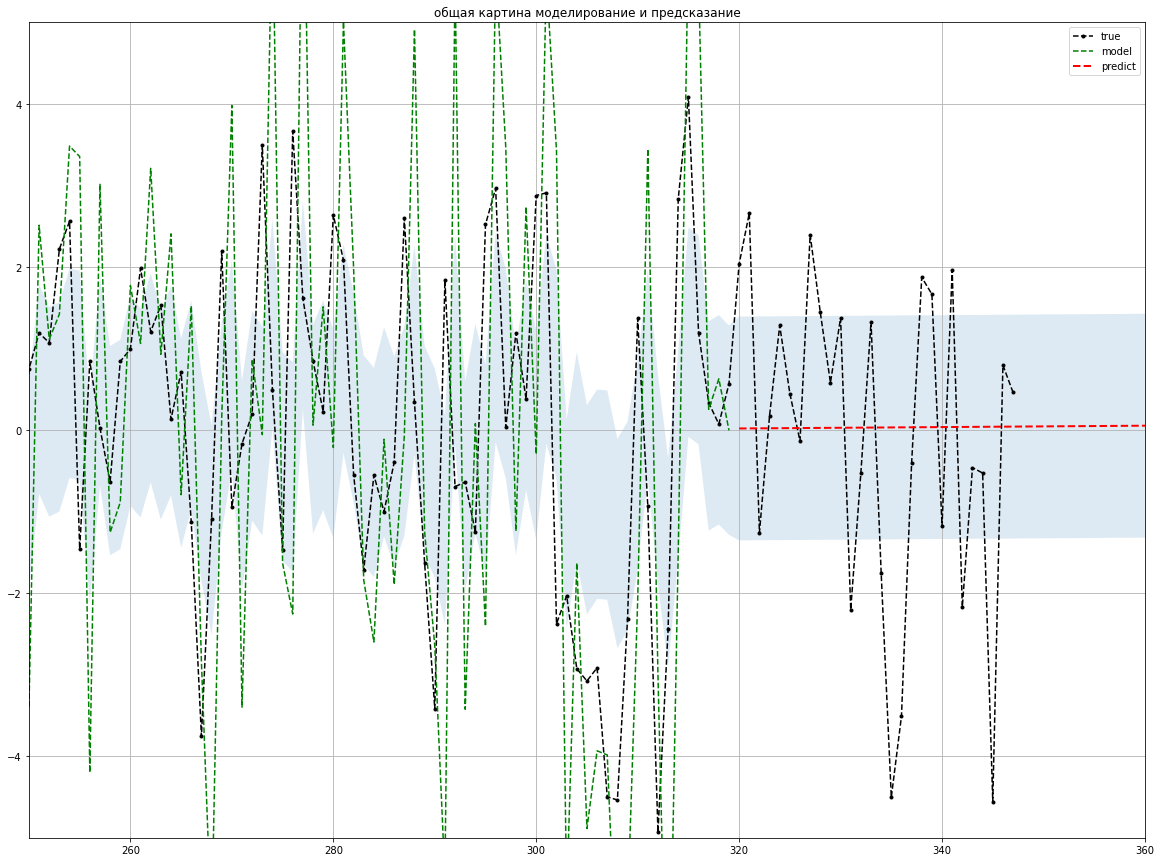

In [125]:
N3 = 20
predict_ = resultsb_optd.get_prediction(end=resultsb_optd.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#

xmin = 250
xmax  = 360

fig, ax = plt.subplots(figsize=(20,15))

ax.plot(brent_dif.values[N3+N1:-1], '--k.',label='true')
plt.axis([xmin, xmax, ymin, ymax])
plt.ylim([-5,5])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast]*5, '--g',label='model') # увеличена амплитуда в 5 раз - иначе не видно
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci.iloc[N3:, 0], predict_ci.iloc[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

Данная модель предсказывает лучше, как минимум направление.

## Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

In [ ]:
Думаю, что лучше работаеют модели стационарные, без тренда (или с постоянным трендом), сезонные и с циклом.